In [1]:
required_packages <- c("patchwork", "tidyverse", "usmap")
new_packages <- required_packages[!(required_packages %in% installed.packages()[, "Package"])]
if (length(new_packages)) install.packages(new_packages)

In [2]:
library(dplyr)
library(ggplot2)
library(readr)
library(stringr)
library(tidyr)

# Set figure sizes
options(repr.plot.width = 9, repr.plot.height = 6)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
# Import fee-for-service Medicare enrollment counts
original_medicare <- read_csv("./data/Filtered/FFS enrollment counts - 2007 to 2018.csv")

# Create empty data frames for each subgroup
all_years_age <- data.frame()
all_years_enrollment <- data.frame()
all_years_race <- data.frame()
all_years_sex <- data.frame()

# Loop through the prevalence data files and filter for the summary data
csv_files <- list.files(path = "./data", pattern = "*.csv", full.names = TRUE)
csv_files <- csv_files[csv_files != "./data/ADDM.csv"]

for (file in csv_files) {
    data <- read_csv(file)
    year <- as.numeric(gsub(".*_(\\d{4})_data\\.csv", "\\1", basename(file)))
    data$Year <- year

    # Filter for the characteristic
    filtered_age <- subset(data, (Bene_Geo_Lvl == "National") & (Bene_Demo_Lvl == "All"))
    filtered_enrollment <- subset(data, (Bene_Geo_Lvl == "National") & (Bene_Demo_Lvl == "Dual Status"))
    filtered_race <- subset(data, (Bene_Geo_Lvl == "National") & (Bene_Demo_Lvl == "Race"))
    filtered_sex <- subset(data, (Bene_Geo_Lvl == "National") & (Bene_Demo_Lvl == "Sex"))

    # Append to separate data frames
    all_years_age <- rbind(all_years_age, filtered_age)
    all_years_enrollment <- rbind(all_years_enrollment, filtered_enrollment)
    all_years_race <- rbind(all_years_race, filtered_race)
    all_years_sex <- rbind(all_years_sex, filtered_sex)
}

# Preview each of the data frames
head(all_years_age)
head(all_years_enrollment)
head(all_years_race)
head(all_years_sex)

Rows: 12 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): Year
num (3): All, <65, 65+

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3198 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Bene_Geo_Lvl, Bene_Geo_Desc, Bene_Geo_Cd, Bene_Age_Lvl, Bene_Demo_L...
dbl (1): Prvlnc

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3198 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Bene_Geo_Lvl, Bene_Geo_Desc, Bene_Geo_Cd, Bene_Age_Lvl, Bene_Demo_L...
dbl (1): Prvlnc

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `s

Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
National,National,NA,All,All,All,Autism Spectrum Disorders,0.0007,2007
National,National,NA,<65,All,All,Autism Spectrum Disorders,0.0041,2007
National,National,NA,65+,All,All,Autism Spectrum Disorders,0.0001,2007
National,National,NA,All,All,All,Autism Spectrum Disorders,0.0008,2008
National,National,NA,<65,All,All,Autism Spectrum Disorders,0.0046,2008
National,National,NA,65+,All,All,Autism Spectrum Disorders,0.0001,2008


Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
National,National,NA,65+,Dual Status,Medicare Only,Autism Spectrum Disorders,0.0000,2007
National,National,NA,<65,Dual Status,Medicare Only,Autism Spectrum Disorders,0.0006,2007
National,National,NA,All,Dual Status,Medicare Only,Autism Spectrum Disorders,0.0001,2007
National,National,NA,65+,Dual Status,Medicare and Medicaid,Autism Spectrum Disorders,0.0003,2007
National,National,NA,<65,Dual Status,Medicare and Medicaid,Autism Spectrum Disorders,0.0073,2007
National,National,NA,All,Dual Status,Medicare and Medicaid,Autism Spectrum Disorders,0.0033,2007


Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
National,National,NA,65+,Race,Asian Pacific Islander,Autism Spectrum Disorders,0.0000,2007
National,National,NA,<65,Race,Asian Pacific Islander,Autism Spectrum Disorders,0.0044,2007
National,National,NA,All,Race,Asian Pacific Islander,Autism Spectrum Disorders,0.0006,2007
National,National,NA,65+,Race,Hispanic,Autism Spectrum Disorders,0.0000,2007
National,National,NA,<65,Race,Hispanic,Autism Spectrum Disorders,0.0024,2007
National,National,NA,All,Race,Hispanic,Autism Spectrum Disorders,0.0006,2007


Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
National,National,NA,65+,Sex,Female,Autism Spectrum Disorders,0.0000,2007
National,National,NA,<65,Sex,Female,Autism Spectrum Disorders,0.0022,2007
National,National,NA,All,Sex,Female,Autism Spectrum Disorders,0.0004,2007
National,National,NA,65+,Sex,Male,Autism Spectrum Disorders,0.0001,2007
National,National,NA,<65,Sex,Male,Autism Spectrum Disorders,0.0058,2007
National,National,NA,All,Sex,Male,Autism Spectrum Disorders,0.0012,2007


In [4]:
# Pivot enrollment counts by year and age group
original_medicare_long <- pivot_longer(original_medicare, cols = -Year, names_to = "Bene_Age_Lvl", values_to = "Enrollment")

# Preview the new data frame
head(original_medicare_long)

# Merge ASD prevalence with enrollment data
prevalence_and_enrollment <- merge(all_years_age, original_medicare_long, by = c("Year", "Bene_Age_Lvl"))

# Preview the merged data frame
head(prevalence_and_enrollment)

# Drop redundant columns
prevalence_and_enrollment <- prevalence_and_enrollment[ , c("Year", "Bene_Age_Lvl", "Prvlnc", "Enrollment")]
names(prevalence_and_enrollment) <- c("Year", "Age_Group", "Prevalence", "Population")

# Calculate number of beneficiaries with ASD by age group (round to nearest whole number)
prevalence_and_enrollment$Have_Autism <- round(prevalence_and_enrollment$Prevalence * prevalence_and_enrollment$Population)

# Preview data
prevalence_and_enrollment

Year,Bene_Age_Lvl,Enrollment
<dbl>,<chr>,<dbl>
2007,All,32872694
2007,<65,5509341
2007,65+,27363353
2008,All,32393536
2008,<65,5512095
2008,65+,26881441


,Year,Bene_Age_Lvl,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Enrollment
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,2007,<65,National,National,NA,All,All,Autism Spectrum Disorders,0.0041,5509341
2,2007,65+,National,National,NA,All,All,Autism Spectrum Disorders,0.0001,27363353
3,2007,All,National,National,NA,All,All,Autism Spectrum Disorders,0.0007,32872694
4,2008,<65,National,National,NA,All,All,Autism Spectrum Disorders,0.0046,5512095
5,2008,65+,National,National,NA,All,All,Autism Spectrum Disorders,0.0001,26881441
6,2008,All,National,National,NA,All,All,Autism Spectrum Disorders,0.0008,32393536


Year,Age_Group,Prevalence,Population,Have_Autism
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2007,<65,0.0041,5509341,22588
2007,65+,0.0001,27363353,2736
2007,All,0.0007,32872694,23011
2008,<65,0.0046,5512095,25356
2008,65+,0.0001,26881441,2688
2008,All,0.0008,32393536,25915
2009,<65,0.0051,5602579,28573
2009,65+,0.0001,26650079,2665
2009,All,0.0009,32252658,29027


In [5]:
# Merge Medicare data with ADDM Network data
prevalence_and_enrollment$Source <- "Fee-for-Service Medicare (CMS)"

# Preview the end of the data frame
tail(prevalence_and_enrollment)

# Import data frm the ADDM Network
addm <- read.csv("data/ADDM.csv")

# Rename columns
names(addm) <- c("Source", "Author", "Year", "Prevalence", "Population", "Have_Autism")

# Re-calculate prevalence
addm$Prevalence <- addm$Have_Autism / addm$Population

# Add the "Age_Group" column
addm$Age_Group <- "8"

# Drop the unused "Author" column
addm <- addm[ , -2]

# Preview the end of the data frame
tail(addm)

# Merge Medicare prevalence/population data with ADDM Network prevalence/population data
autism_data <- bind_rows(prevalence_and_enrollment, addm)

# Sort in ascending order by Year
autism_data <- arrange(autism_data, Year)

# Preview data
autism_data

,Year,Age_Group,Prevalence,Population,Have_Autism,Source
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
31,2017,<65,0.0136,5374712,73096,Fee-for-Service Medicare (CMS)
32,2017,65+,0.0002,28459602,5692,Fee-for-Service Medicare (CMS)
33,2017,All,0.0024,33834314,81202,Fee-for-Service Medicare (CMS)
34,2018,<65,0.0157,5077913,79723,Fee-for-Service Medicare (CMS)
35,2018,65+,0.0003,28425321,8528,Fee-for-Service Medicare (CMS)
36,2018,All,0.0026,33503234,87108,Fee-for-Service Medicare (CMS)


,Source,Year,Prevalence,Population,Have_Autism,Age_Group
,<chr>,<int>,<dbl>,<int>,<int>,<chr>
3,ADDM Network (CDC),2010,0.01467495,363749,5338,8
4,ADDM Network (CDC),2012,0.01447066,346978,5021,8
5,ADDM Network (CDC),2014,0.01681501,325483,5473,8
6,ADDM Network (CDC),2016,0.01854629,275419,5108,8
7,ADDM Network (CDC),2018,0.02296158,220281,5058,8
8,ADDM Network (CDC),2020,0.02759136,226339,6245,8


Year,Age_Group,Prevalence,Population,Have_Autism,Source
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2006,8,0.008950194,308038,2757,ADDM Network (CDC)
2007,<65,0.004100000,5509341,22588,Fee-for-Service Medicare (CMS)
2007,65+,0.000100000,27363353,2736,Fee-for-Service Medicare (CMS)
2007,All,0.000700000,32872694,23011,Fee-for-Service Medicare (CMS)
2008,<65,0.004600000,5512095,25356,Fee-for-Service Medicare (CMS)
2008,65+,0.000100000,26881441,2688,Fee-for-Service Medicare (CMS)
2008,All,0.000800000,32393536,25915,Fee-for-Service Medicare (CMS)
2008,8,0.011332184,337093,3820,ADDM Network (CDC)
2009,<65,0.005100000,5602579,28573,Fee-for-Service Medicare (CMS)


In [6]:
# Align data by filtering for even years
autism_data_filtered <- subset(autism_data, Year == 2006 | Year == 2008 | Year == 2010 | Year == 2012 | Year == 2014 | Year == 2016 | Year == 2018 | Year == 2020)

# Calculate change in prevalence divided by change in population, as well as relative changes
comparison <- autism_data_filtered %>%
    group_by(Source, Age_Group) %>%
    mutate(
      change_in_prevalence = Have_Autism - lag(Have_Autism),
      change_in_population = Population - lag(Population),
      adjusted_rate_of_change = change_in_prevalence / change_in_population * 100,
      relative_change_in_prevalence = (Prevalence - lag(Have_Autism)) / lag(Have_Autism) * 100,
      relative_change_in_prevalence = (Prevalence - lag(Prevalence)) / lag(Prevalence) * 100,
      relative_change_in_population = (Population - lag(Population)) / lag(Population) * 100
)

# Preview result
head(comparison)

# Calculate relative changes for Medicare only
prevalence_and_enrollment_changes <- prevalence_and_enrollment %>%
    group_by(Age_Group) %>%
    mutate(
      relative_change_in_prevalence = (Prevalence - lag(Prevalence)) / lag(Prevalence) * 100,
      relative_change_in_population = (Population - lag(Population)) / lag(Population) * 100
)

# Preview result
head(prevalence_and_enrollment_changes)

Year,Age_Group,Prevalence,Population,Have_Autism,Source,change_in_prevalence,change_in_population,adjusted_rate_of_change,relative_change_in_prevalence,relative_change_in_population
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2006,8,0.008950194,308038,2757,ADDM Network (CDC),NA,NA,NA,NA,NA
2008,<65,0.004600000,5512095,25356,Fee-for-Service Medicare (CMS),NA,NA,NA,NA,NA
2008,65+,0.000100000,26881441,2688,Fee-for-Service Medicare (CMS),NA,NA,NA,NA,NA
2008,All,0.000800000,32393536,25915,Fee-for-Service Medicare (CMS),NA,NA,NA,NA,NA
2008,8,0.011332184,337093,3820,ADDM Network (CDC),1063,29055,3.658579,26.61383,9.432278
2010,<65,0.005600000,5820030,32592,Fee-for-Service Medicare (CMS),7236,307935,2.349847,21.73913,5.586533


Year,Age_Group,Prevalence,Population,Have_Autism,Source,relative_change_in_prevalence,relative_change_in_population
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2007,<65,0.0041,5509341,22588,Fee-for-Service Medicare (CMS),NA,NA
2007,65+,0.0001,27363353,2736,Fee-for-Service Medicare (CMS),NA,NA
2007,All,0.0007,32872694,23011,Fee-for-Service Medicare (CMS),NA,NA
2008,<65,0.0046,5512095,25356,Fee-for-Service Medicare (CMS),12.19512,0.04998783
2008,65+,0.0001,26881441,2688,Fee-for-Service Medicare (CMS),0.00000,-1.76115844
2008,All,0.0008,32393536,25915,Fee-for-Service Medicare (CMS),14.28571,-1.45761707


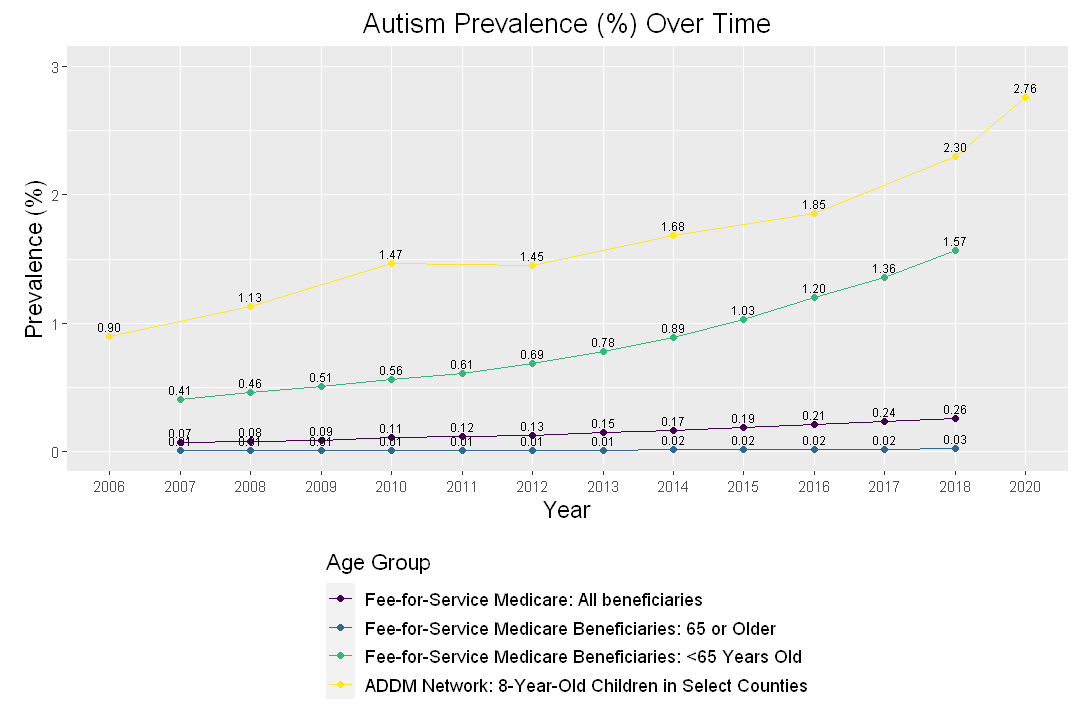

In [7]:
# Convert prevalence values to percentages
autism_data$Prevalence_Percent <- autism_data$Prevalence * 100

# Initialize legend labels based on age groups
legend_labels <- c("All" = "Fee-for-Service Medicare: All beneficiaries",
    "65+" = "Fee-for-Service Medicare Beneficiaries: 65 or Older",
    "<65" = "Fee-for-Service Medicare Beneficiaries: <65 Years Old",
    "8" = "ADDM Network: 8-Year-Old Children in Select Counties")

autism_data$Age_Group <- factor(autism_data$Age_Group, levels = c("All", "65+", "<65", "8"))

# Create the figure
ggplot(data = autism_data, aes(x = as.factor(Year), y = Prevalence_Percent, group = Age_Group, col = Age_Group)) +
    geom_line() +
    geom_point() +
    scale_color_viridis_d(name = "Age Group", # Using a colorblind-friendly palette: https://r-graphics.org/recipe-colors-palette-discrete-colorblind
        breaks = c("All", "65+", "<65", "8"),
        labels = c("Fee-for-Service Medicare: All beneficiaries", "Fee-for-Service Medicare Beneficiaries: 65 or Older", "Fee-for-Service Medicare Beneficiaries: <65 Years Old", "ADDM Network: 8-Year-Old Children in Select Counties")) +
    geom_text(aes(label = sprintf("%0.2f", Prevalence_Percent)), vjust = -0.5, color = "black", size = 2.5) +
    ylim(c(0, 3)) +
    xlab("Year") +
    ylab("Prevalence (%)") +
    ggtitle("Autism Prevalence (%) Over Time") +
    theme(axis.title = element_text(size = 14),
        legend.position = "bottom",
        legend.direction = "vertical",
        legend.title = element_text(size = 13),
        legend.text = element_text(size = 11),
        plot.title = element_text(hjust = 0.5, size = 16),
        text = element_text(color = "black"),
        plot.margin = margin(0.25, 0.25, 0.25, 0.5, "cm"))

# Save the figure
ggsave("Figure 1 - ASD prevalence over time.jpg", width = 9.5, height = 6.5, units = "in", bg = "white", dpi = 320)

Warning message:
"Removed 6 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 6 rows containing missing values (`geom_text()`)."
Warning message:
"Removed 6 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 6 rows containing missing values (`geom_text()`)."


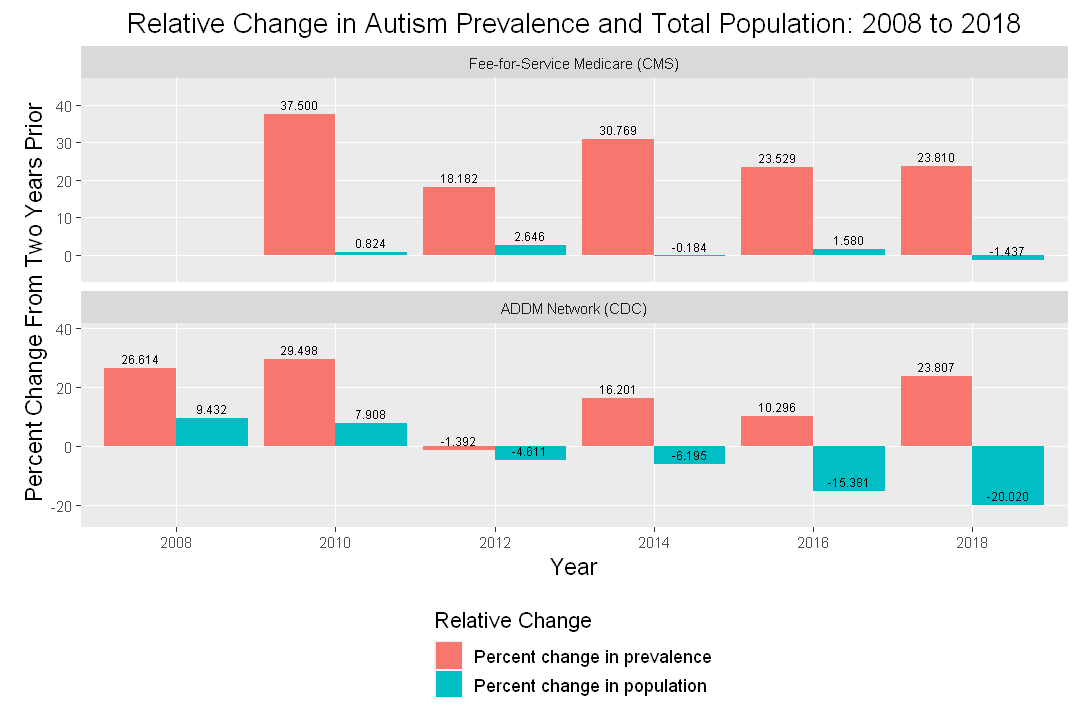

In [8]:
# Pivot the filtered data with calculated percent changes
comparison_long <- pivot_longer(comparison, cols = -c(Year, Age_Group, Source))

# Filter the result
comparison_filtered <- subset(comparison_long, (name == "relative_change_in_population" | name == "relative_change_in_prevalence") & (Age_Group == "All" | Age_Group == "8"))

# Initialize facet labels based on age groups
comparison_filtered$name <- factor(comparison_filtered$name, levels = c("relative_change_in_prevalence", "relative_change_in_population"))
comparison_filtered$Source <- factor(comparison_filtered$Source, levels = c("Fee-for-Service Medicare (CMS)", "ADDM Network (CDC)"))

# Create the figure
ggplot(data = comparison_filtered, aes(x = as.factor(Year), y = value, fill = name)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    scale_fill_discrete(name = "Relative Change",
        breaks = c("relative_change_in_prevalence", "relative_change_in_population"),
        labels = c("Percent change in prevalence", "Percent change in population")) +
    facet_wrap(~ Source, ncol = 1, scales = "free_y") +
    scale_y_continuous(expand = expansion(mult = c(0.15, 0.25))) +
    xlim(as.factor(c("2008", "2010", "2012", "2014", "2016", "2018"))) +
    xlab("Year") +
    ylab("Percent Change From Two Years Prior") +
    geom_text(aes(label = sprintf("%0.3f", value)), position = position_dodge(0.9), vjust = -0.5, color = "black", size = 2.5) +
    ggtitle("Relative Change in Autism Prevalence and Total Population: 2008 to 2018") +
    theme(axis.title = element_text(size = 14),
        legend.position = "bottom",
        legend.direction = "vertical",
        legend.title = element_text(size = 13),
        legend.text = element_text(size = 11),
        panel.grid.minor = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 16),
        text = element_text(color = "black"),
        plot.margin = margin(0.25, 0.25, 0.25, 0.5, "cm"))

# Save the figure
ggsave("Figure 3 - Relative change - CMS and CDC.jpg", width = 9.5, height = 6.5, units = "in", bg = "#898484", dpi = 320)